## **Modul 2: Data Analysis – Data Visualization**

### **Cohort**

Sebuah perusahaan yang menjual peralatan sepeda bernama BikeStore ingin melakukan analisis 
berdasarkan data yang mereka punya di tahun sebelumnya, yaitu tahun 2017.

Anda bekerja sebagai data scientist di perusahaan ini. Anda mendapatkan satu dataset berisikan daftar 
transaksi selama tahun 2017 dan diminta untuk melakukan beberapa analisis..

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from operator import attrgetter

<hr>

### **Nomor 1**

 Sebelum melakukan analisis, tampilkan dataset store_bike.csv! Di dalamnya ada kolom 
'transaction_date' berisi tanggal transaksi, ubah tipe datanya dari object menjadi datetime! 
Kemudian hapus semua baris yang memiliki missing value dari dataframe!


In [3]:
df = pd.read_csv('store_bike.csv', parse_dates=['transaction_date'],dtype={'customer_id':str})
df.dropna(inplace=True)
df


C:\Users\Vincent\AppData\Local\Temp\ipykernel_12016\2678007403.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('store_bike.csv', parse_dates=['transaction_date'],dtype={'customer_id':str})


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,"$1,203.40",37823.0
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,$312.74,35560.0
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,$44.71,40410.0
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,$136.73,38216.0


<hr>

### **Nomor 2**

Departement marketing meminta Anda untuk membuat analisis perilaku customer selama 
tahun 2017. Coba buatlah cohort analysis berdasarkan data yang diberikan. Bagaimana perilaku 
customer BikeStore selama tahun 2017?

In [4]:
df2= df[['customer_id', 'transaction_date']]
df2['cohort'] = df2.groupby('customer_id')['transaction_date'].transform('min').dt.to_period('M')
df2['transaction_date'] = df2['transaction_date'].dt.to_period('M')
df2 = df2.groupby(['cohort','transaction_date'])[['customer_id']].nunique().reset_index()
df2['period'] = (df2['transaction_date'] - df2['cohort']).apply(attrgetter('n'))
df2.rename(columns={'customer_id':'customers'},inplace=True)
df2['%_customers'] = df2.groupby('cohort')['customers'].transform('max')
df2['%_customers'] = (df2['customers']/df2['%_customers'])*100
df2

C:\Users\Vincent\AppData\Local\Temp\ipykernel_12016\2485078064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cohort'] = df2.groupby('customer_id')['transaction_date'].transform('min').dt.to_period('M')
C:\Users\Vincent\AppData\Local\Temp\ipykernel_12016\2485078064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['transaction_date'] = df2['transaction_date'].dt.to_period('M')


,cohort,transaction_date,customers,period,%_customers
0,2017-01,2017-01,1321,0,100.000000
1,2017-01,2017-02,464,1,35.124905
2,2017-01,2017-03,477,2,36.109008
3,2017-01,2017-04,483,3,36.563210
4,2017-01,2017-05,480,4,36.336109
...,...,...,...,...,...
73,2017-10,2017-11,6,1,26.086957
74,2017-10,2017-12,8,2,34.782609
75,2017-11,2017-11,15,0,100.000000
76,2017-11,2017-12,6,1,40.000000


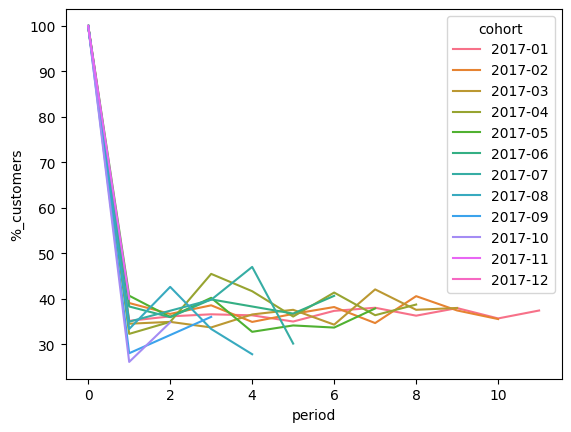

In [5]:
sns.lineplot(data=df2,x='period',y='%_customers',hue='cohort')
plt.show()

<Axes: xlabel='period', ylabel='cohort'>

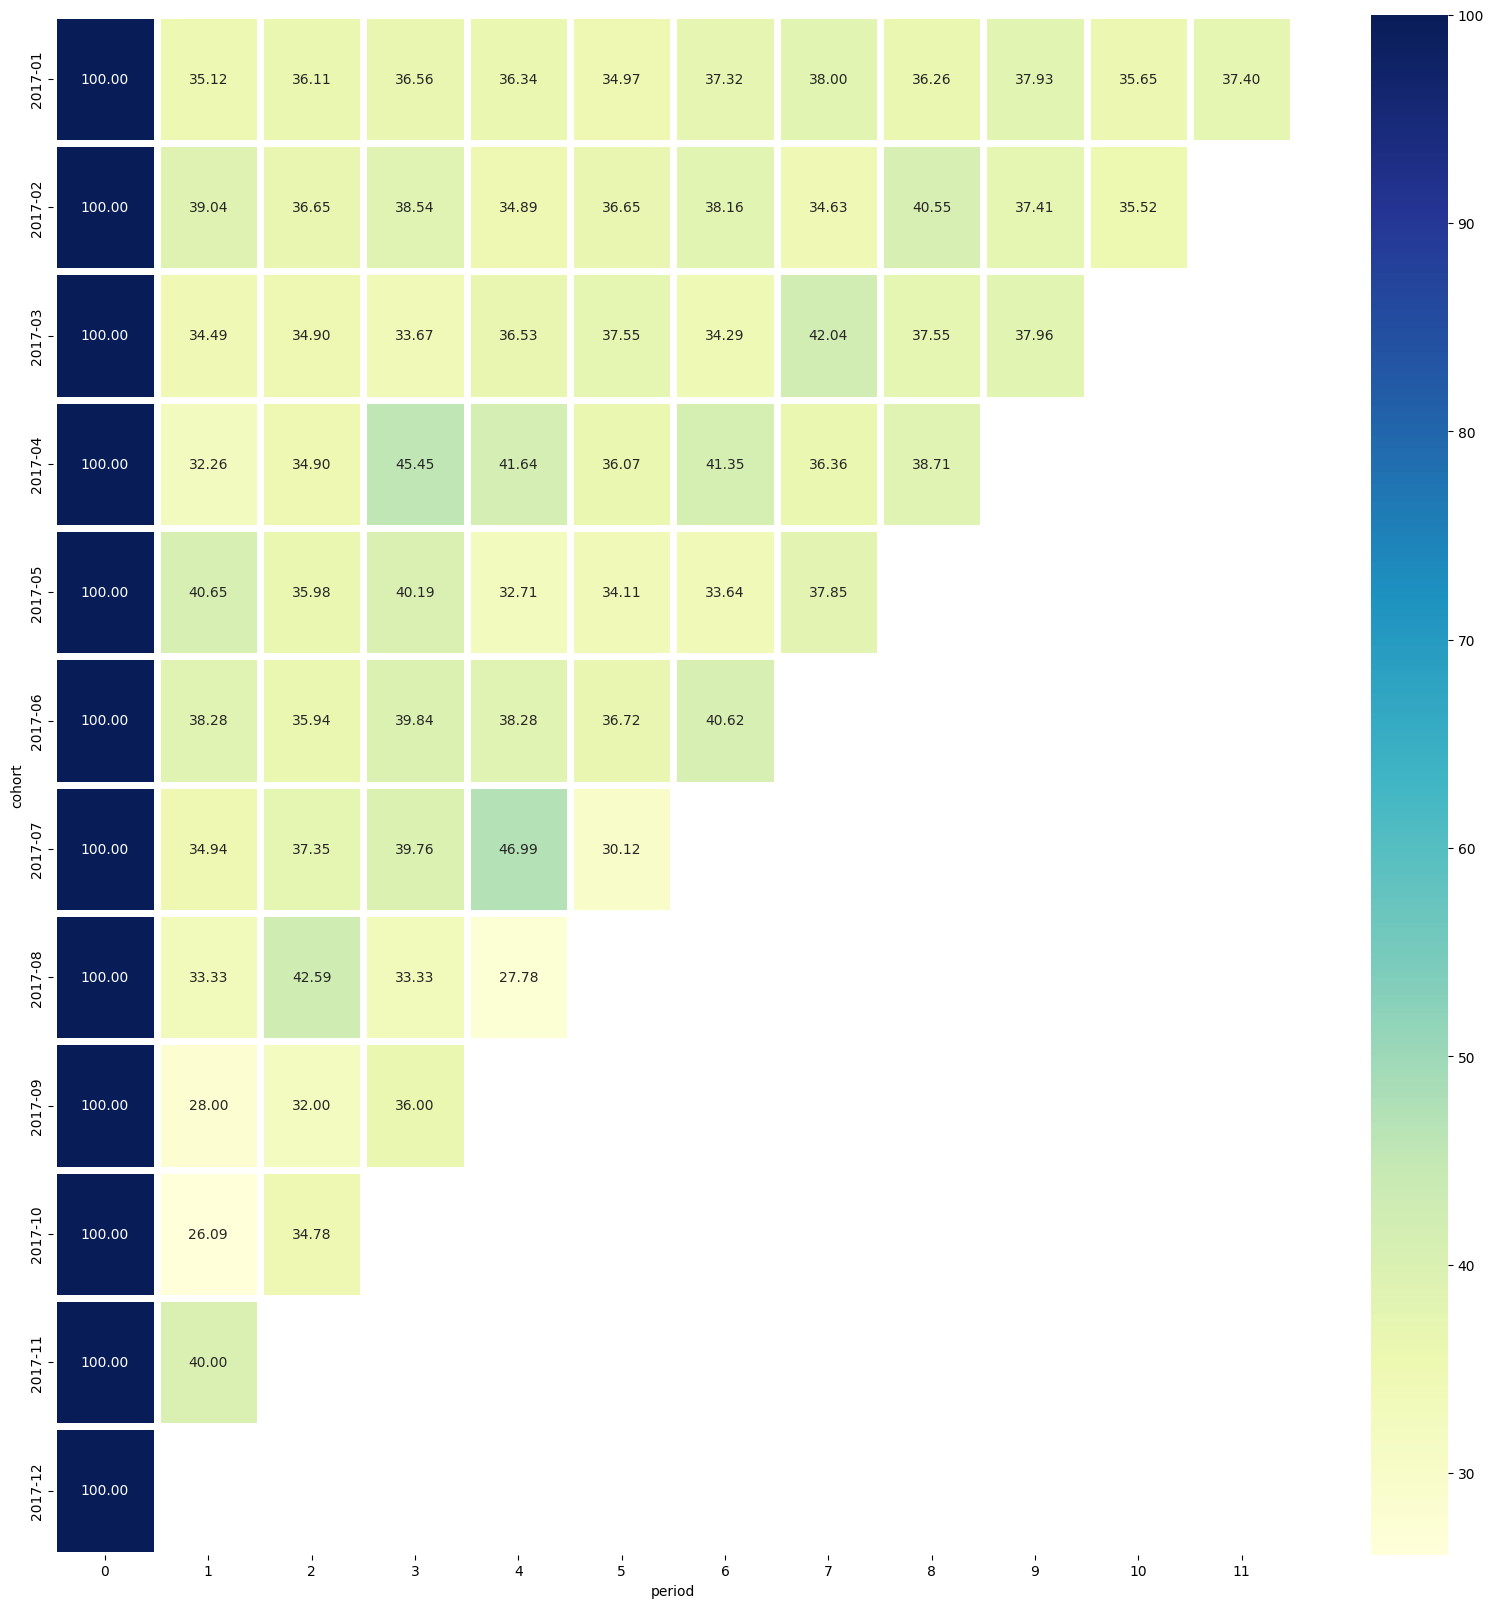

In [6]:
df2pv = df2.pivot_table(index='cohort',columns='period', values='%_customers')
plt.figure(figsize=(20,20))
sns.heatmap(df2pv, annot= True, fmt='.2f',cmap= 'YlGnBu', linewidths=5)

<Axes: xlabel='%_customers', ylabel='Count'>

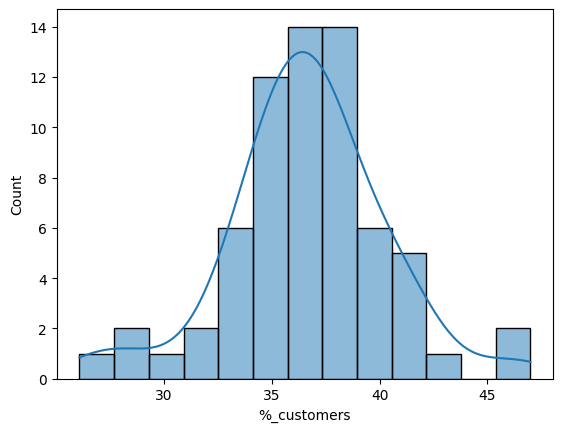

In [7]:
sns.histplot(data = df2[df2['%_customers']!=100],x='%_customers', kde=True)

In [8]:
from scipy.stats import shapiro
sh = shapiro(df2['%_customers'])
sh
if sh[1]>0.05:
    print(f'P Value= {sh[1]}, Normal Distribution')
else:
    print(f'P Value= {sh[1]}, Not Normal Distribution')

P Value= 7.873191573519456e-14, Not Normal Distribution


In [13]:
print(f'Kesimpulan Retensi customer tiap bulannya stabil sepanjang tahun dengan retensi berkisar {df2["%_customers"].median().round(0)} %')

Kesimpulan Retensi customer tiap bulannya stabil sepanjang tahun dengan retensi berkisar 37.0 %
